<div align="center"> <h1>Asset Enteric-Fermentation Emissions CSV</h1></div>

### About This Notebook
This notebook explores the contents of the csv file.
Various exploratory techniques will be used to analyze the content of the csv and perform any necessary cleanups.

## Section 1: DATA EXPLORATION

## About Data Exploration

- We used basic pandas functions and a very tiny input from our end to explore the data and have a visual representation of it.
- The goal was to see how the data was organized, if anything obvious stood out, if there were any clear connections between the columns etc.
- We also wanted to see which columns had redundant and/or less useful data and filter them out. 

In [1]:
# Import necessary libraries to use for the exploration & analysis
import csv 
import pandas as pd
import matplotlib.pyplot as plt

# Set up the number of columns to use when showing a data frame using pandas
pd.set_option('display.max_columns', 200)

In [2]:
# Import the csv file and convert it to a pandas data frame 
df = pd.read_csv("../data/agriculture/asset_enteric-fermentation_emissions.csv")

In [3]:
# Show the shape of the data frame (rows, columns)
# The returned value is the number of rows and columns in the dataframe
df.shape

(15305, 21)

In [4]:
# Show the first 5 rows by using the head command
df.head()

,asset_id,iso3_country,original_inventory_sector,start_time,end_time,temporal_granularity,lat_lon,gas,emissions_quantity,emissions_factor,emissions_factor_units,capacity,capacity_units,capacity_factor,activity,activity_units,created_date,modified_date,asset_name,asset_type,st_astext
0,5100086,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,NaN,co2,0.0,0.000,tonnes_gas_per_animal_head,1.0,area_sq_meters_of_intensive_farm,NaN,9000,total_animal_head_count,2022-09-13 19:15:49.594347,2023-04-11 18:56:31.292708,USA_CA_dairy_1296,enteric_fermentation_dairy,POINT(-119.76448059 36.16134652)
1,5100086,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,NaN,ch4,1152.0,0.128,tonnes_gas_per_animal_head,1.0,area_sq_meters_of_intensive_farm,NaN,9000,total_animal_head_count,2022-09-13 19:15:49.594347,2023-04-11 18:56:31.292708,USA_CA_dairy_1296,enteric_fermentation_dairy,POINT(-119.76448059 36.16134652)
2,5100086,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,NaN,n2o,0.0,0.000,tonnes_gas_per_animal_head,1.0,area_sq_meters_of_intensive_farm,NaN,9000,total_animal_head_count,2022-09-13 19:15:49.594347,2023-04-11 18:56:31.292708,USA_CA_dairy_1296,enteric_fermentation_dairy,POINT(-119.76448059 36.16134652)
3,5100086,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,NaN,co2e_100yr,51163.2,0.000,tonnes_gas_per_animal_head,1.0,area_sq_meters_of_intensive_farm,NaN,9000,total_animal_head_count,2022-09-13 19:15:49.594347,2023-04-11 18:56:31.292708,USA_CA_dairy_1296,enteric_fermentation_dairy,POINT(-119.76448059 36.16134652)
4,5100086,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,NaN,co2e_20yr,151984.8,0.000,tonnes_gas_per_animal_head,1.0,area_sq_meters_of_intensive_farm,NaN,9000,total_animal_head_count,2022-09-13 19:15:49.594347,2023-04-11 18:56:31.292708,USA_CA_dairy_1296,enteric_fermentation_dairy,POINT(-119.76448059 36.16134652)


In [5]:
# This let's us view the bottom 5 by using the tail command
df.tail()

,asset_id,iso3_country,original_inventory_sector,start_time,end_time,temporal_granularity,lat_lon,gas,emissions_quantity,emissions_factor,emissions_factor_units,capacity,capacity_units,capacity_factor,activity,activity_units,created_date,modified_date,asset_name,asset_type,st_astext
15300,5099868,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,NaN,co2e_100yr,400.3840,0.000,tonnes_gas_per_animal_head,1.000000,area_sq_km_of_intensive_farm,NaN,115,total_animal_head_count,2022-09-13 19:15:49.590226,NaN,USA_CA_dairy_11,enteric_fermentation_dairy,POINT(-124.173725 40.524349)
15301,5099868,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,NaN,co2e_20yr,1189.3760,0.000,tonnes_gas_per_animal_head,1.000000,area_sq_km_of_intensive_farm,NaN,115,total_animal_head_count,2022-09-13 19:15:49.590226,NaN,USA_CA_dairy_11,enteric_fermentation_dairy,POINT(-124.173725 40.524349)
15302,5099316,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,NaN,ch4,63.7060,0.053,tonnes_gas_per_animal_head,0.000450,area_sq_km_of_intensive_farm,NaN,1202,total_animal_head_count,2022-09-13 19:15:49.577669,NaN,USA_TX_beef_124,enteric_fermentation_beef,POINT(-100.3350449 35.99106317)
15303,5100715,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,NaN,ch4,141.3120,0.128,tonnes_gas_per_animal_head,1.000000,area_sq_km_of_intensive_farm,NaN,1104,total_animal_head_count,2022-09-13 19:15:49.618992,NaN,USA_CA_dairy_694,enteric_fermentation_dairy,POINT(-121.01243 37.4324)
15304,5099525,USA,enteric-fermentation,2020-01-01 00:00:00,2020-12-31 00:00:00,annual,NaN,co2e_100yr,7765.8992,0.000,tonnes_gas_per_animal_head,0.014637,area_sq_km_of_intensive_farm,NaN,5387,total_animal_head_count,2022-09-13 19:15:49.580862,NaN,USA_TX_beef_312,enteric_fermentation_beef,POINT(-102.3937642 35.1093388)


In [6]:
# Have a glimpse of the entire data set as a technical summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15305 entries, 0 to 15304
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   asset_id                   15305 non-null  int64  
 1   iso3_country               15305 non-null  object 
 2   original_inventory_sector  15305 non-null  object 
 3   start_time                 15305 non-null  object 
 4   end_time                   15305 non-null  object 
 5   temporal_granularity       15305 non-null  object 
 6   lat_lon                    0 non-null      float64
 7   gas                        15305 non-null  object 
 8   emissions_quantity         15305 non-null  float64
 9   emissions_factor           12266 non-null  float64
 10  emissions_factor_units     15285 non-null  object 
 11  capacity                   15305 non-null  float64
 12  capacity_units             15305 non-null  object 
 13  capacity_factor            0 non-null      flo

#### Here are some of the keys for understanding pandas data types
int64 => Integer

object => String

float64 => Float

In [7]:
# Check on the overal distribution of all numerical data columns
df.describe()

,asset_id,lat_lon,emissions_quantity,emissions_factor,capacity,capacity_factor,activity
count,1.530500e+04,0.0,15305.000000,12266.000000,15305.000000,0.0,15305.000000
mean,7.492681e+06,NaN,8079.948491,0.022444,0.337352,NaN,5830.718719
std,6.614724e+07,NaN,32241.502397,0.043159,0.627582,NaN,14354.706544
min,5.099010e+06,NaN,0.000000,0.000000,0.000006,NaN,100.000000
25%,5.099427e+06,NaN,0.000000,0.000000,0.002141,NaN,785.000000
50%,5.099871e+06,NaN,140.800000,0.000000,0.020713,NaN,1600.000000
75%,5.100636e+06,NaN,4550.656000,0.000000,0.961318,NaN,3605.000000
max,1.836078e+09,NaN,851531.000000,0.128000,10.540186,NaN,188000.000000


In [8]:
# Drop all columns with null values
# Assign the dataframe with the dropped column to a new variable to save changes.
df = df.drop(["lat_lon", "capacity_factor"], axis=1)

In [9]:
# Confirm columns or Series (as they are called in pandas) are dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15305 entries, 0 to 15304
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   asset_id                   15305 non-null  int64  
 1   iso3_country               15305 non-null  object 
 2   original_inventory_sector  15305 non-null  object 
 3   start_time                 15305 non-null  object 
 4   end_time                   15305 non-null  object 
 5   temporal_granularity       15305 non-null  object 
 6   gas                        15305 non-null  object 
 7   emissions_quantity         15305 non-null  float64
 8   emissions_factor           12266 non-null  float64
 9   emissions_factor_units     15285 non-null  object 
 10  capacity                   15305 non-null  float64
 11  capacity_units             15305 non-null  object 
 12  activity                   15305 non-null  int64  
 13  activity_units             15305 non-null  obj

In [10]:
# Drop any and all columns that are unnecessary 
df = df.drop(["modified_date"], axis=1)

In [11]:
# Confirm unnecessary column(s) have been successfuly removed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15305 entries, 0 to 15304
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   asset_id                   15305 non-null  int64  
 1   iso3_country               15305 non-null  object 
 2   original_inventory_sector  15305 non-null  object 
 3   start_time                 15305 non-null  object 
 4   end_time                   15305 non-null  object 
 5   temporal_granularity       15305 non-null  object 
 6   gas                        15305 non-null  object 
 7   emissions_quantity         15305 non-null  float64
 8   emissions_factor           12266 non-null  float64
 9   emissions_factor_units     15285 non-null  object 
 10  capacity                   15305 non-null  float64
 11  capacity_units             15305 non-null  object 
 12  activity                   15305 non-null  int64  
 13  activity_units             15305 non-null  obj

In [12]:
# Display the top [insert number here] rows to have a glimpse of how the dataframe looks like
# The number passed to the `df.head()` is the number of rows that will be returned
df.head(10)

,asset_id,iso3_country,original_inventory_sector,start_time,end_time,temporal_granularity,gas,emissions_quantity,emissions_factor,emissions_factor_units,capacity,capacity_units,activity,activity_units,created_date,asset_name,asset_type,st_astext
0,5100086,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2,0.0000,0.000,tonnes_gas_per_animal_head,1.0,area_sq_meters_of_intensive_farm,9000,total_animal_head_count,2022-09-13 19:15:49.594347,USA_CA_dairy_1296,enteric_fermentation_dairy,POINT(-119.76448059 36.16134652)
1,5100086,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,ch4,1152.0000,0.128,tonnes_gas_per_animal_head,1.0,area_sq_meters_of_intensive_farm,9000,total_animal_head_count,2022-09-13 19:15:49.594347,USA_CA_dairy_1296,enteric_fermentation_dairy,POINT(-119.76448059 36.16134652)
2,5100086,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,n2o,0.0000,0.000,tonnes_gas_per_animal_head,1.0,area_sq_meters_of_intensive_farm,9000,total_animal_head_count,2022-09-13 19:15:49.594347,USA_CA_dairy_1296,enteric_fermentation_dairy,POINT(-119.76448059 36.16134652)
3,5100086,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2e_100yr,51163.2000,0.000,tonnes_gas_per_animal_head,1.0,area_sq_meters_of_intensive_farm,9000,total_animal_head_count,2022-09-13 19:15:49.594347,USA_CA_dairy_1296,enteric_fermentation_dairy,POINT(-119.76448059 36.16134652)
4,5100086,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2e_20yr,151984.8000,0.000,tonnes_gas_per_animal_head,1.0,area_sq_meters_of_intensive_farm,9000,total_animal_head_count,2022-09-13 19:15:49.594347,USA_CA_dairy_1296,enteric_fermentation_dairy,POINT(-119.76448059 36.16134652)
5,5100088,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2,0.0000,0.000,tonnes_gas_per_animal_head,1.0,area_sq_meters_of_intensive_farm,10776,total_animal_head_count,2022-09-13 19:15:49.594383,USA_CA_dairy_1298,enteric_fermentation_dairy,POINT(-119.39844329 35.97133785)
6,5100088,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,ch4,1379.3280,0.128,tonnes_gas_per_animal_head,1.0,area_sq_meters_of_intensive_farm,10776,total_animal_head_count,2022-09-13 19:15:49.594383,USA_CA_dairy_1298,enteric_fermentation_dairy,POINT(-119.39844329 35.97133785)
7,5100088,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,n2o,0.0000,0.000,tonnes_gas_per_animal_head,1.0,area_sq_meters_of_intensive_farm,10776,total_animal_head_count,2022-09-13 19:15:49.594383,USA_CA_dairy_1298,enteric_fermentation_dairy,POINT(-119.39844329 35.97133785)
8,5100088,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2e_100yr,61259.4048,0.000,tonnes_gas_per_animal_head,1.0,area_sq_meters_of_intensive_farm,10776,total_animal_head_count,2022-09-13 19:15:49.594383,USA_CA_dairy_1298,enteric_fermentation_dairy,POINT(-119.39844329 35.97133785)
9,5100088,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2e_20yr,181976.4672,0.000,tonnes_gas_per_animal_head,1.0,area_sq_meters_of_intensive_farm,10776,total_animal_head_count,2022-09-13 19:15:49.594383,USA_CA_dairy_1298,enteric_fermentation_dairy,POINT(-119.39844329 35.97133785)


In [13]:
# Display the bottom [insert number here] rows to have a glimpse of how the dataframe looks like
# The number passed to the `df.tail()` is the number of rows that will be returned
df.tail(10)

,asset_id,iso3_country,original_inventory_sector,start_time,end_time,temporal_granularity,gas,emissions_quantity,emissions_factor,emissions_factor_units,capacity,capacity_units,activity,activity_units,created_date,asset_name,asset_type,st_astext
15295,5099329,USA,enteric-fermentation,2020-01-01 00:00:00,2020-12-31 00:00:00,annual,co2,0.0000,NaN,tonnes_gas_per_animal_head,0.000539,area_sq_km_of_intensive_farm,1286,total_animal_head_count,2022-09-13 19:15:49.577877,USA_TX_beef_136,enteric_fermentation_beef,POINT(-102.6015472 34.45882395)
15296,5101236,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,n2o,0.0000,0.000,tonnes_gas_per_animal_head,0.007023,area_sq_km_of_intensive_farm,1169,total_animal_head_count,2022-09-13 19:15:49.624807,USA_TX_dairy_85,enteric_fermentation_dairy,POINT(-102.5121073 36.23801092)
15297,5101236,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2e_100yr,4069.9904,0.000,tonnes_gas_per_animal_head,0.007023,area_sq_km_of_intensive_farm,1169,total_animal_head_count,2022-09-13 19:15:49.624807,USA_TX_dairy_85,enteric_fermentation_dairy,POINT(-102.5121073 36.23801092)
15298,5101236,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2e_20yr,12090.2656,0.000,tonnes_gas_per_animal_head,0.007023,area_sq_km_of_intensive_farm,1169,total_animal_head_count,2022-09-13 19:15:49.624807,USA_TX_dairy_85,enteric_fermentation_dairy,POINT(-102.5121073 36.23801092)
15299,5099868,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,n2o,0.0000,0.000,tonnes_gas_per_animal_head,1.000000,area_sq_km_of_intensive_farm,115,total_animal_head_count,2022-09-13 19:15:49.590226,USA_CA_dairy_11,enteric_fermentation_dairy,POINT(-124.173725 40.524349)
15300,5099868,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2e_100yr,400.3840,0.000,tonnes_gas_per_animal_head,1.000000,area_sq_km_of_intensive_farm,115,total_animal_head_count,2022-09-13 19:15:49.590226,USA_CA_dairy_11,enteric_fermentation_dairy,POINT(-124.173725 40.524349)
15301,5099868,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2e_20yr,1189.3760,0.000,tonnes_gas_per_animal_head,1.000000,area_sq_km_of_intensive_farm,115,total_animal_head_count,2022-09-13 19:15:49.590226,USA_CA_dairy_11,enteric_fermentation_dairy,POINT(-124.173725 40.524349)
15302,5099316,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,ch4,63.7060,0.053,tonnes_gas_per_animal_head,0.000450,area_sq_km_of_intensive_farm,1202,total_animal_head_count,2022-09-13 19:15:49.577669,USA_TX_beef_124,enteric_fermentation_beef,POINT(-100.3350449 35.99106317)
15303,5100715,USA,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,ch4,141.3120,0.128,tonnes_gas_per_animal_head,1.000000,area_sq_km_of_intensive_farm,1104,total_animal_head_count,2022-09-13 19:15:49.618992,USA_CA_dairy_694,enteric_fermentation_dairy,POINT(-121.01243 37.4324)
15304,5099525,USA,enteric-fermentation,2020-01-01 00:00:00,2020-12-31 00:00:00,annual,co2e_100yr,7765.8992,0.000,tonnes_gas_per_animal_head,0.014637,area_sq_km_of_intensive_farm,5387,total_animal_head_count,2022-09-13 19:15:49.580862,USA_TX_beef_312,enteric_fermentation_beef,POINT(-102.3937642 35.1093388)


## Section 2: DATA ANALYSIS

## About Data Analysis

- We used various rough, scientific and unscientific methods to analyze the data in order to make sense of it and attempt to understand it. 
- Certain cells were not generated or were consolidated into one cell with the goal of not wanting to lengthen the experiement beyond what was necessary just to get to the message.

In [14]:
# We create a new dataframe and name it "usa_df" 
usa_df = df[df["iso3_country"] == "USA"]

In [15]:
# Get a summary of "usa_df" 
usa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14575 entries, 0 to 15304
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   asset_id                   14575 non-null  int64  
 1   iso3_country               14575 non-null  object 
 2   original_inventory_sector  14575 non-null  object 
 3   start_time                 14575 non-null  object 
 4   end_time                   14575 non-null  object 
 5   temporal_granularity       14575 non-null  object 
 6   gas                        14575 non-null  object 
 7   emissions_quantity         14575 non-null  float64
 8   emissions_factor           11682 non-null  float64
 9   emissions_factor_units     14555 non-null  object 
 10  capacity                   14575 non-null  float64
 11  capacity_units             14575 non-null  object 
 12  activity                   14575 non-null  int64  
 13  activity_units             14575 non-null  obj

In [16]:
# Based on the summary above, we have other values that are not from the USA
# Assign remaning dataframe to placeholder dataframe "not_usa_df"
not_usa_df = df[df["iso3_country"] != "USA"]

In [17]:
# Have a look at the top countries in the placeholder dataframe
not_usa_df.head()

,asset_id,iso3_country,original_inventory_sector,start_time,end_time,temporal_granularity,gas,emissions_quantity,emissions_factor,emissions_factor_units,capacity,capacity_units,activity,activity_units,created_date,asset_name,asset_type,st_astext
78,5101283,ARG,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2,0.0,NaN,tonnes_gas_per_animal_head,0.056486,area_sq_km_of_intensive_farm,10282,total_animal_head_count,2022-09-13 19:15:49.625287,ARG_beef_32,enteric_fermentation_beef,POINT(-65.1736 -34.4137)
144,5101351,ARG,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2,0.0,NaN,tonnes_gas_per_animal_head,0.006687,area_sq_km_of_intensive_farm,3743,total_animal_head_count,2022-09-13 19:15:49.625835,ARG_beef_100,enteric_fermentation_beef,POINT(-62.6523 -36.397)
166,5101385,ARG,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2,0.0,NaN,tonnes_gas_per_animal_head,0.010055,area_sq_km_of_intensive_farm,4518,total_animal_head_count,2022-09-13 19:15:49.62607,ARG_beef_134,enteric_fermentation_beef,POINT(-61.4932 -38.7776)
200,5101294,ARG,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2,0.0,NaN,tonnes_gas_per_animal_head,0.006334,area_sq_km_of_intensive_farm,3651,total_animal_head_count,2022-09-13 19:15:49.625451,ARG_beef_43,enteric_fermentation_beef,POINT(-62.7182 -36.3173)
216,5101323,ARG,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2,0.0,NaN,tonnes_gas_per_animal_head,0.001804,area_sq_km_of_intensive_farm,2094,total_animal_head_count,2022-09-13 19:15:49.625642,ARG_beef_72,enteric_fermentation_beef,POINT(-59.241 -37.4552)


In [18]:
# Create and assign all dataframe from Argentina to "arg_df"
# Get a summary of "arg_df"
arg_df = df[df["iso3_country"] == "ARG"]
arg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 78 to 15093
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   asset_id                   730 non-null    int64  
 1   iso3_country               730 non-null    object 
 2   original_inventory_sector  730 non-null    object 
 3   start_time                 730 non-null    object 
 4   end_time                   730 non-null    object 
 5   temporal_granularity       730 non-null    object 
 6   gas                        730 non-null    object 
 7   emissions_quantity         730 non-null    float64
 8   emissions_factor           584 non-null    float64
 9   emissions_factor_units     730 non-null    object 
 10  capacity                   730 non-null    float64
 11  capacity_units             730 non-null    object 
 12  activity                   730 non-null    int64  
 13  activity_units             730 non-null    obje

In [19]:
# Assign and use new placeholder "not_usa_arg_df" to find out if there are any other countries
# Get a summary of "not_usa_arg_df"
not_usa_arg_df = df[(df["iso3_country"] != "USA") & (df["iso3_country"] != "ARG")]
not_usa_arg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   asset_id                   0 non-null      int64  
 1   iso3_country               0 non-null      object 
 2   original_inventory_sector  0 non-null      object 
 3   start_time                 0 non-null      object 
 4   end_time                   0 non-null      object 
 5   temporal_granularity       0 non-null      object 
 6   gas                        0 non-null      object 
 7   emissions_quantity         0 non-null      float64
 8   emissions_factor           0 non-null      float64
 9   emissions_factor_units     0 non-null      object 
 10  capacity                   0 non-null      float64
 11  capacity_units             0 non-null      object 
 12  activity                   0 non-null      int64  
 13  activity_units             0 non-null      object 
 14  create

### Comments so far...
- We know the above technique used to filter and separate our dataframe would have been inefficient if there were multiple countries in the dataframe.
- The reason as to why this technique was used is mainly because we were tired from working on all these notebooks all day and late into the night while balancing part time jobs and school.
- This is not a good enough reason, we know, however, we're are also learning to do this on our own one step at a time with the help of internet searches to get us through unforseen challenges. 
- We will refine our methods over time and this will serve as a display of our skills progression.

## Section 3: ARGENTINA DATA ANALYSIS

### About Argentina Data Analysis

- This section will focus with the analysis of the Argentina dataframe.
- Any insight gained in this section will provide insight on how to approach the US dataframe.

In [20]:
# Summarize the dataframe to get an overview of what "arg_df" entails
arg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 78 to 15093
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   asset_id                   730 non-null    int64  
 1   iso3_country               730 non-null    object 
 2   original_inventory_sector  730 non-null    object 
 3   start_time                 730 non-null    object 
 4   end_time                   730 non-null    object 
 5   temporal_granularity       730 non-null    object 
 6   gas                        730 non-null    object 
 7   emissions_quantity         730 non-null    float64
 8   emissions_factor           584 non-null    float64
 9   emissions_factor_units     730 non-null    object 
 10  capacity                   730 non-null    float64
 11  capacity_units             730 non-null    object 
 12  activity                   730 non-null    int64  
 13  activity_units             730 non-null    obje

In [21]:
# Let's begin refreshing our memory on how the general format of the dataframe looks like using "arg_df"
arg_df.head()

,asset_id,iso3_country,original_inventory_sector,start_time,end_time,temporal_granularity,gas,emissions_quantity,emissions_factor,emissions_factor_units,capacity,capacity_units,activity,activity_units,created_date,asset_name,asset_type,st_astext
78,5101283,ARG,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2,0.0,NaN,tonnes_gas_per_animal_head,0.056486,area_sq_km_of_intensive_farm,10282,total_animal_head_count,2022-09-13 19:15:49.625287,ARG_beef_32,enteric_fermentation_beef,POINT(-65.1736 -34.4137)
144,5101351,ARG,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2,0.0,NaN,tonnes_gas_per_animal_head,0.006687,area_sq_km_of_intensive_farm,3743,total_animal_head_count,2022-09-13 19:15:49.625835,ARG_beef_100,enteric_fermentation_beef,POINT(-62.6523 -36.397)
166,5101385,ARG,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2,0.0,NaN,tonnes_gas_per_animal_head,0.010055,area_sq_km_of_intensive_farm,4518,total_animal_head_count,2022-09-13 19:15:49.62607,ARG_beef_134,enteric_fermentation_beef,POINT(-61.4932 -38.7776)
200,5101294,ARG,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2,0.0,NaN,tonnes_gas_per_animal_head,0.006334,area_sq_km_of_intensive_farm,3651,total_animal_head_count,2022-09-13 19:15:49.625451,ARG_beef_43,enteric_fermentation_beef,POINT(-62.7182 -36.3173)
216,5101323,ARG,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2,0.0,NaN,tonnes_gas_per_animal_head,0.001804,area_sq_km_of_intensive_farm,2094,total_animal_head_count,2022-09-13 19:15:49.625642,ARG_beef_72,enteric_fermentation_beef,POINT(-59.241 -37.4552)


In [22]:
# In order to understand which columns have numerical data that's useful, 
# we can check by running the describe function
arg_df.describe()

,asset_id,emissions_quantity,emissions_factor,capacity,activity
count,7.300000e+02,730.000000,584.000000,730.000000,730.000000
mean,5.101324e+06,8678.824877,0.014219,0.085991,7092.602740
std,4.217448e+01,25071.180253,0.024717,0.376574,10197.063014
min,5.101252e+06,0.000000,0.000000,0.000009,614.000000
25%,5.101288e+06,0.000000,0.000000,0.001797,2063.000000
50%,5.101324e+06,209.440000,0.000000,0.006792,3740.000000
75%,5.101361e+06,7138.432000,0.014000,0.037664,8442.000000
max,5.101397e+06,387223.334400,0.072000,4.131745,85578.000000


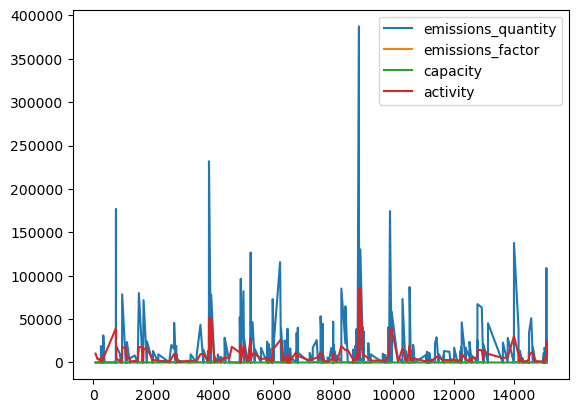

In [23]:
# Let's do a plot of some columns to see if there's a relationship between them
arg_df[["emissions_quantity", "emissions_factor", "capacity", "activity"]].plot()
plt.show()

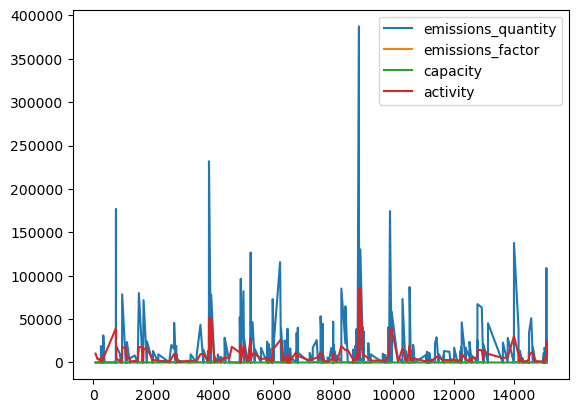

In [24]:
# We can also get the above graph by dropping an unwanted column
arg_df.drop(["asset_id"], axis=1).plot()
plt.show()

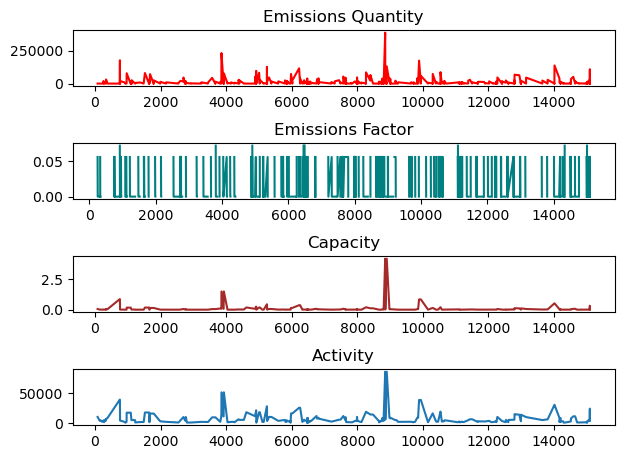

In [25]:
# Define the subplot layout and enable sharing x axis using `sharex` set to True
# If the data is alreayd conforming to a uniform x-axis, no need to set the `sharex` to True
fig, axes = plt.subplots(nrows=4, ncols=1)

# Add even spacing between each subplot
fig.tight_layout(pad=2.0)

# Add Series to plots, set placement order, set color and title
arg_df["emissions_quantity"].plot(ax=axes[0], color="red").set_title("Emissions Quantity")
arg_df["emissions_factor"].plot(ax=axes[1], color="teal").set_title("Emissions Factor")
arg_df["capacity"].plot(ax=axes[2], color="brown").set_title("Capacity")
arg_df["activity"].plot(ax=axes[3]).set_title("Activity")

# Remove dtype above the graphs
plt.show()

### Comments so far...
- From the looks of things, 
- `emissions_factor` may not be an appropriate column to use in ploting as it is discontinous in nature. 
- We won't be using it from now on to plot graphs

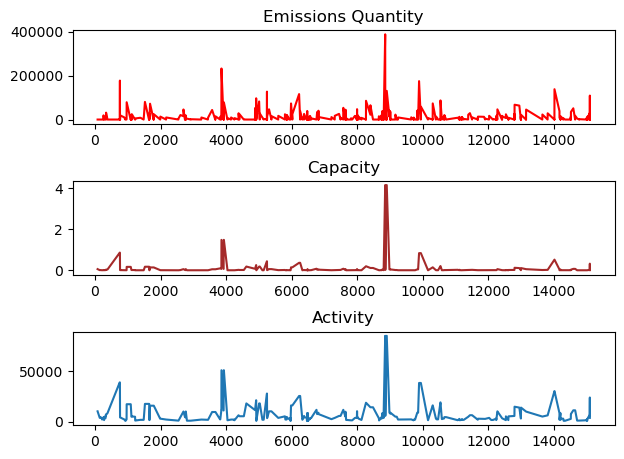

In [26]:
# Let's plot the graphs one more time to see how they are connected as they all seem to conform in the x-axis
fig, axes = plt.subplots(nrows=3, ncols=1)

# Add even spacing between each subplot
fig.tight_layout(pad=2.0)

# Add Series to plots, set placement order, set color and title and remove "emissions_factor" column
arg_df["emissions_quantity"].plot(ax=axes[0], color="red").set_title("Emissions Quantity")
arg_df["capacity"].plot(ax=axes[1], color="brown").set_title("Capacity")
arg_df["activity"].plot(ax=axes[2]).set_title("Activity")

# Remove dtype above the graphs
plt.show()

### Comments so far...
- The graphs being rendered above are being drawn with the x-axis being the indices generated by pandas for us.
- The y-axis values on the other hand, are the maximum values of each column's category hence the differences in max amount
- By running `arg_df.describe()`, we get to see the minimum & maximum values of each numerical column which explains the variations above. 

In [27]:
# Let' describe the data one more time
arg_df.describe()

,asset_id,emissions_quantity,emissions_factor,capacity,activity
count,7.300000e+02,730.000000,584.000000,730.000000,730.000000
mean,5.101324e+06,8678.824877,0.014219,0.085991,7092.602740
std,4.217448e+01,25071.180253,0.024717,0.376574,10197.063014
min,5.101252e+06,0.000000,0.000000,0.000009,614.000000
25%,5.101288e+06,0.000000,0.000000,0.001797,2063.000000
50%,5.101324e+06,209.440000,0.000000,0.006792,3740.000000
75%,5.101361e+06,7138.432000,0.014000,0.037664,8442.000000
max,5.101397e+06,387223.334400,0.072000,4.131745,85578.000000


In [28]:
# View the dataframe
arg_df.head(10)

,asset_id,iso3_country,original_inventory_sector,start_time,end_time,temporal_granularity,gas,emissions_quantity,emissions_factor,emissions_factor_units,capacity,capacity_units,activity,activity_units,created_date,asset_name,asset_type,st_astext
78,5101283,ARG,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2,0.0000,NaN,tonnes_gas_per_animal_head,0.056486,area_sq_km_of_intensive_farm,10282,total_animal_head_count,2022-09-13 19:15:49.625287,ARG_beef_32,enteric_fermentation_beef,POINT(-65.1736 -34.4137)
144,5101351,ARG,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2,0.0000,NaN,tonnes_gas_per_animal_head,0.006687,area_sq_km_of_intensive_farm,3743,total_animal_head_count,2022-09-13 19:15:49.625835,ARG_beef_100,enteric_fermentation_beef,POINT(-62.6523 -36.397)
166,5101385,ARG,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2,0.0000,NaN,tonnes_gas_per_animal_head,0.010055,area_sq_km_of_intensive_farm,4518,total_animal_head_count,2022-09-13 19:15:49.62607,ARG_beef_134,enteric_fermentation_beef,POINT(-61.4932 -38.7776)
200,5101294,ARG,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2,0.0000,NaN,tonnes_gas_per_animal_head,0.006334,area_sq_km_of_intensive_farm,3651,total_animal_head_count,2022-09-13 19:15:49.625451,ARG_beef_43,enteric_fermentation_beef,POINT(-62.7182 -36.3173)
216,5101323,ARG,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2,0.0000,NaN,tonnes_gas_per_animal_head,0.001804,area_sq_km_of_intensive_farm,2094,total_animal_head_count,2022-09-13 19:15:49.625642,ARG_beef_72,enteric_fermentation_beef,POINT(-59.241 -37.4552)
251,5101339,ARG,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2,0.0000,NaN,tonnes_gas_per_animal_head,0.008515,area_sq_km_of_intensive_farm,4183,total_animal_head_count,2022-09-13 19:15:49.625753,ARG_beef_88,enteric_fermentation_beef,POINT(-61.9821 -30.9281)
253,5101339,ARG,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,ch4,234.2480,0.056,tonnes_gas_per_animal_head,0.008515,area_sq_km_of_intensive_farm,4183,total_animal_head_count,2022-09-13 19:15:49.625753,ARG_beef_88,enteric_fermentation_beef,POINT(-61.9821 -30.9281)
255,5101339,ARG,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,n2o,0.0000,0.000,tonnes_gas_per_animal_head,0.008515,area_sq_km_of_intensive_farm,4183,total_animal_head_count,2022-09-13 19:15:49.625753,ARG_beef_88,enteric_fermentation_beef,POINT(-61.9821 -30.9281)
257,5101339,ARG,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2e_100yr,6371.5456,0.000,tonnes_gas_per_animal_head,0.008515,area_sq_km_of_intensive_farm,4183,total_animal_head_count,2022-09-13 19:15:49.625753,ARG_beef_88,enteric_fermentation_beef,POINT(-61.9821 -30.9281)
259,5101339,ARG,enteric-fermentation,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,co2e_20yr,18927.2384,0.000,tonnes_gas_per_animal_head,0.008515,area_sq_km_of_intensive_farm,4183,total_animal_head_count,2022-09-13 19:15:49.625753,ARG_beef_88,enteric_fermentation_beef,POINT(-61.9821 -30.9281)


 ### Notes
 - By viewing the dataframe one more time, we take note of the numerical columns and what is supposed to be their units of measurement.
 - Here's what we found:
| Numerical Equivalent | Unit of Measurement |
| :- | :- |
| Emissions Quantity | CH4, CO2e 100yr, CO2e 20yr |
| Emissions Factor | Tonnes gas per animal head |
| Capacity | Area sq Km of intensive farm |
| Activity | Total animal head count |